<font size=3>__Option 3: Maintenance cost reduction through predictive techniques__ </font>

<font size=2>__BACKGROUND__ </font><br>
A company has a fleet of devices transmitting daily telemetry readings. They would like to create a predictive
maintenance solution to proactively identify when maintenance should be performed. This approach promises cost
savings over routine or time-based preventive maintenance, because tasks are performed only when warranted.
<font size=2>__GOAL__ </font><br>
You are tasked with building a predictive model using machine learning to predict the probability of a device failure.
When building this model, be sure to minimize false positives and false negatives. The column you are trying to predict
is called failure with binary value 0 for non-failure and 1 for failure.


Load Data

In [68]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns=999

path = '/axp/rim/imsads/dev/snall10/adhoc/excercise/'
g_df=pd.read_csv(path+'predictive_maintenance.csv')

In [69]:
g_df.head()

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3


In [70]:
print(g_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124494 entries, 0 to 124493
Data columns (total 12 columns):
date       124494 non-null object
id         124494 non-null object
failure    124494 non-null int64
metric1    124494 non-null int64
metric2    124494 non-null int64
metric3    124494 non-null int64
metric4    124494 non-null int64
metric5    124494 non-null int64
metric6    124494 non-null int64
metric7    124494 non-null int64
metric8    124494 non-null int64
metric9    124494 non-null int64
dtypes: int64(10), object(2)
memory usage: 11.4+ MB
None


In [71]:
print("Loaded:", g_df.shape[1],"columns and",g_df.shape[0],"rows of data")

Loaded: 12 columns and 124494 rows of data


Exploratory Data Analysis

In [72]:
g_df.describe()

,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9
count,124494.000000,1.244940e+05,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000,124494.000000
mean,0.000851,1.223881e+08,159.484762,9.940455,1.741120,14.222669,260172.657726,0.292528,0.292528,12.451524
std,0.029167,7.045933e+07,2179.657730,185.747321,22.908507,15.943028,99151.078547,7.436924,7.436924,191.425623
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000
25%,0.000000,6.128476e+07,0.000000,0.000000,0.000000,8.000000,221452.000000,0.000000,0.000000,0.000000
50%,0.000000,1.227974e+08,0.000000,0.000000,0.000000,10.000000,249799.500000,0.000000,0.000000,0.000000
75%,0.000000,1.833096e+08,0.000000,0.000000,0.000000,12.000000,310266.000000,0.000000,0.000000,0.000000
max,1.000000,2.441405e+08,64968.000000,24929.000000,1666.000000,98.000000,689161.000000,832.000000,832.000000,18701.000000


In [73]:
#No missing data
missing_data = pd.DataFrame({'total_missing': g_df.isnull().sum(), 'perc_missing': (g_df.isnull().mean())})
missing_data

,perc_missing,total_missing
date,0.0,0
id,0.0,0
failure,0.0,0
metric1,0.0,0
metric2,0.0,0
metric3,0.0,0
metric4,0.0,0
metric5,0.0,0
metric6,0.0,0
metric7,0.0,0


In [74]:
#Total no of unique machines
g_df.id.nunique()

1169

In [75]:
g_df.failure.value_counts()
# 1 - failure 
# 0 - non failure

0    124388
1       106
Name: failure, dtype: int64

In [78]:
g_df.id.value_counts()[:50]

S1F0FP0C    304
S1F0GCED    304
W1F0JXDL    304
S1F0FGBQ    304
Z1F0QLC1    304
S1F0EGMT    304
Z1F0GE1M    304
Z1F0KKN4    304
W1F0FY92    304
Z1F0GB8A    304
S1F0E9EP    304
S1F0GGPP    304
W1F0G9T7    304
W1F0SJJ2    304
W1F0FEH7    304
S1F0GPXY    304
S1F0KYCR    304
W1F05X69    304
W1F0JY02    304
Z1F0MA1S    304
Z1F0KJDS    304
Z1F0Q8RT    304
Z1F0QK05    304
S1F0H6JG    304
Z1F0QL3N    304
W1F0JH87    304
W1F0FZPA    304
W1F0T0B1    299
Z1F1A0RP    295
W1F19J5Q    295
Z1F1A1HH    295
W1F1BRM3    295
Z1F1479Y    295
S1F12XGM    295
S1F13MAM    295
W1F1BFHS    295
W1F1N6V6    295
Z1F11SL0    295
Z1F1652D    295
Z1F11SYE    295
S1F100R5    295
S1F13CMG    295
S1F135SZ    295
S1F131F6    295
S1F122KD    295
S1F10FF0    295
Z1F18YB3    295
S1F11C16    295
W1F1CJ3G    295
S1F12ZRR    295
Name: id, dtype: int64

In [77]:
#Calculating Failure rate
failure_rate = g_df.failure.value_counts()[1]/(g_df.failure.value_counts()[1]+g_df.failure.value_counts()[0]) *100
print("Failure rate in %:", failure_rate)

Failure rate in %: 0.0851446656063746


In [79]:
g_df['id'].describe()

count       124494
unique        1169
top       S1F0FP0C
freq           304
Name: id, dtype: object

In [81]:
#Understanding date distribution
g_df["date_dt"] = pd.to_datetime(g_df["date"])
g_df['date_ym']=g_df['date_dt'].map(lambda x: x.strftime('%Y-%m'))
t1=g_df[['date_ym']]
for column in t1.columns:
    print("----------------------------------------------------------------")
    print(column+":")
    print("Unique Column values:")
    print("----------------------------------------------------------------")
    print(g_df[column].unique())
    print("----------------------------------------------------------------")
    print("Count of unique column values:")
    print(g_df[column].nunique())
    print("----------------------------------------------------------------")
    print("Counts:")
    print(g_df[column].value_counts())


----------------------------------------------------------------
date_ym:
Unique Column values:
----------------------------------------------------------------
['2015-01' '2015-02' '2015-03' '2015-04' '2015-05' '2015-06' '2015-07'
 '2015-08' '2015-09' '2015-10' '2015-11']
----------------------------------------------------------------
Count of unique column values:
11
----------------------------------------------------------------
Counts:
2015-01    25032
2015-03    19833
2015-02    19500
2015-04    12012
2015-05    11330
2015-07    10531
2015-06    10469
2015-08     8346
2015-09     4470
2015-10     2940
2015-11       31
Name: date_ym, dtype: int64


In [82]:
g_df['date_dt'].describe()

count                  124494
unique                    304
top       2015-01-03 00:00:00
freq                     1163
first     2015-01-01 00:00:00
last      2015-11-02 00:00:00
Name: date_dt, dtype: object

In [16]:
g_df['date_dt'].value_counts()

2015-01-03    1163
2015-01-01    1163
2015-01-02    1163
2015-01-04    1162
2015-01-05    1161
2015-01-06    1054
2015-01-07     798
2015-01-08     756
2015-01-09     756
2015-01-12     755
2015-01-13     755
2015-01-11     755
2015-01-10     755
2015-01-14     716
2015-01-17     715
2015-01-16     715
2015-01-29     715
2015-01-15     715
2015-01-18     714
2015-01-20     713
2015-01-19     713
2015-01-22     712
2015-01-28     712
2015-02-10     712
2015-02-05     712
2015-02-03     712
2015-01-21     712
2015-01-24     712
2015-01-31     712
2015-02-07     712
              ... 
2015-09-04     146
2015-09-08     146
2015-10-04     146
2015-10-09     141
2015-10-06     141
2015-10-07     141
2015-10-08     141
2015-10-10     140
2015-10-12     140
2015-10-11     140
2015-09-03     115
2015-10-14     111
2015-10-13     111
2015-10-18     109
2015-10-19     109
2015-10-16     109
2015-10-17     109
2015-10-15     109
2015-10-22      69
2015-10-20      69
2015-10-21      69
2015-10-26  

Text(0.5, 1.0, 'Frequency distribution of date_ym')

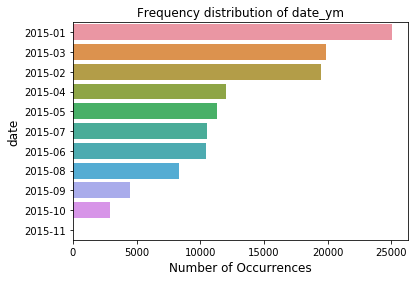

In [83]:
import seaborn as sns
d=g_df['date_ym'].value_counts()[:20]
sns.barplot(x= d.values, y = d.index)
plt.xlabel('Number of Occurrences', fontsize=12)
plt.ylabel('date', fontsize=12)
plt.title('Frequency distribution of date_ym',fontsize=12)

In [84]:
g_df.head()

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,date_dt,date_ym
0,2015-01-01,S1F01085,0,215630672,56,0,52,6,407438,0,0,7,2015-01-01,2015-01
1,2015-01-01,S1F0166B,0,61370680,0,3,0,6,403174,0,0,0,2015-01-01,2015-01
2,2015-01-01,S1F01E6Y,0,173295968,0,0,0,12,237394,0,0,0,2015-01-01,2015-01
3,2015-01-01,S1F01JE0,0,79694024,0,0,0,6,410186,0,0,0,2015-01-01,2015-01
4,2015-01-01,S1F01R2B,0,135970480,0,0,0,15,313173,0,0,3,2015-01-01,2015-01


In [85]:
#Total no of failures by month
g_df.groupby('date_ym').agg({'failure':'sum'})

,failure
date_ym,
2015-01,24
2015-02,14
2015-03,9
2015-04,9
2015-05,21
2015-06,6
2015-07,16
2015-08,4
2015-09,0


In [86]:
#Confirming that there were 0 failures on the first day
g_df.loc[(g_df['failure']==1) & (g_df['date']=='2015-01-01')].sort_values(by = ['date_dt'],ascending = True)

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric8,metric9,date_dt,date_ym


In [23]:
#Looks like every machine failed once or less 
g_df.groupby('id').agg({'failure':'sum'}).sort_values(by = ['failure'],ascending = False)[:100]

,failure
id,
Z1F0LSNZ,1
W1F1230J,1
Z1F0P5D9,1
S1F0L0DW,1
W1F1DQN8,1
S1F0JGJV,1
S1F0JD7P,1
S1F0J5JH,1
Z1F0QH0C,1


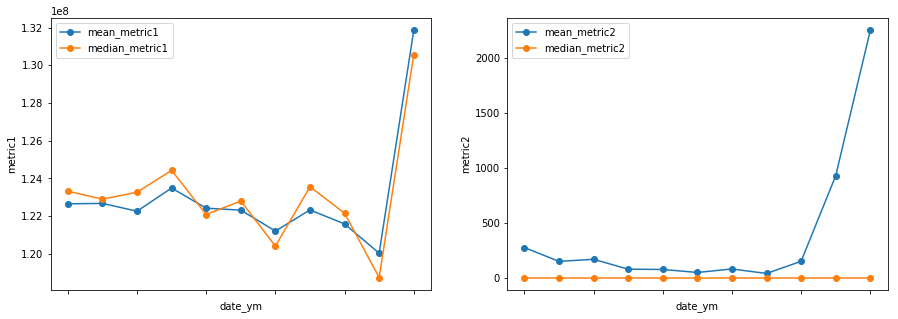

In [87]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric11']=g_df['metric1']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric1': 'mean','metric11': 'median'}).rename(columns = {'metric1':'mean_metric1', 'metric11': 'median_metric1'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric1', 'median_metric1'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric1")

g_df['metric22']=g_df['metric2']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric2': 'mean','metric22': 'median'}).rename(columns = {'metric2':'mean_metric2', 'metric22': 'median_metric2'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric2', 'median_metric2'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric2")

plt.show()

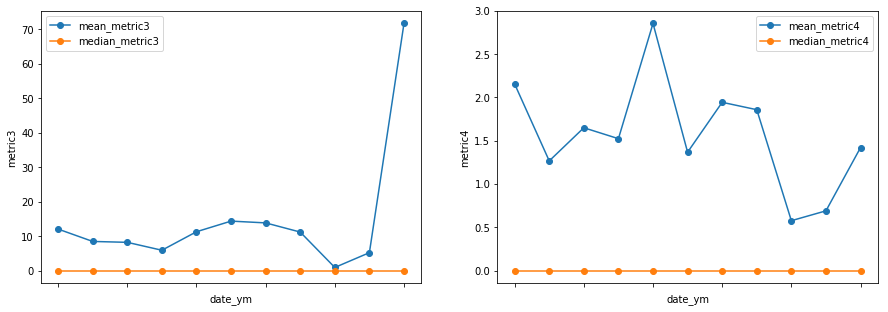

In [88]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric33']=g_df['metric3']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric3': 'mean','metric33': 'median'}).rename(columns = {'metric3':'mean_metric3', 'metric33': 'median_metric3'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric3', 'median_metric3'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric3")

g_df['metric44']=g_df['metric4']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric4': 'mean','metric44': 'median'}).rename(columns = {'metric4':'mean_metric4', 'metric44': 'median_metric4'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric4', 'median_metric4'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric4")

plt.show()


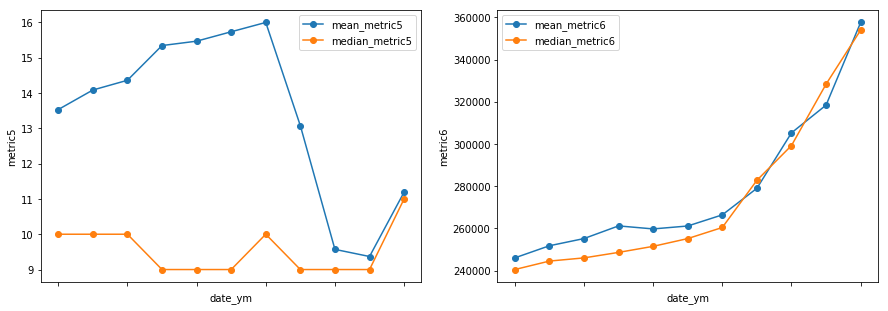

In [89]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric55']=g_df['metric5']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric5': 'mean','metric55': 'median'}).rename(columns = {'metric5':'mean_metric5', 'metric55': 'median_metric5'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric5', 'median_metric5'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric5")

g_df['metric66']=g_df['metric6']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric6': 'mean','metric66': 'median'}).rename(columns = {'metric6':'mean_metric6', 'metric66': 'median_metric6'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric6', 'median_metric6'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric6")

plt.show()


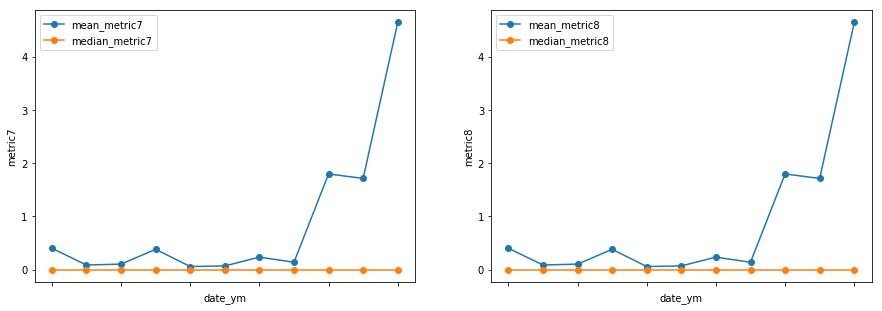

In [90]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric77']=g_df['metric7']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric7': 'mean','metric77': 'median'}).rename(columns = {'metric7':'mean_metric7', 'metric77': 'median_metric7'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric7', 'median_metric7'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric7")

g_df['metric88']=g_df['metric8']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'metric8': 'mean','metric88': 'median'}).rename(columns = {'metric8':'mean_metric8', 'metric88': 'median_metric8'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_metric8', 'median_metric8'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("metric8")

plt.show()


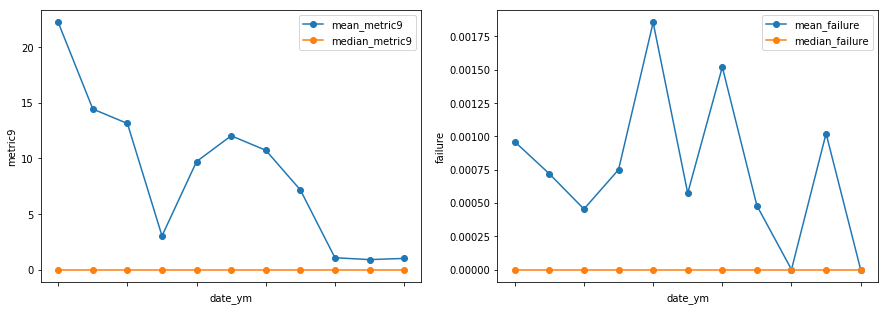

In [91]:
#plot mean and median metrics by date_ym
fig,ax = plt.subplots(1,2,figsize = (20,4)) 
g_df['metric99']=g_df['metric9']
df1 = g_df.groupby(["date_ym"], as_index=False).agg({'metric9': 'mean','metric99': 'median'}).rename(columns = {'metric9':'mean_metric9', 'metric99': 'median_metric9'}) 
ax[0] = df1.plot(x='date_ym', y=['mean_metric9', 'median_metric9'], kind='line', style="-o", figsize=(15,5),ax=ax[0])
ax[0].set_ylabel("metric9")

g_df['failure1']=g_df['failure']
df2 = g_df.groupby(["date_ym"], as_index=False).agg({'failure': 'mean','failure1': 'median'}).rename(columns = {'failure':'mean_failure', 'failure1': 'median_failure'}) 
ax[1] = df2.plot(x='date_ym', y=['mean_failure', 'median_failure'], kind='line', style="-o", figsize=(15,5),ax=ax[1])
ax[1].set_ylabel("failure")

plt.show()

From the above figures, it looks like for most of the metrics median is flat however for metric1 and metric6 mean and median are closer, seems that the data is normally distributed for these two variables   

In [92]:
#Check to see if both these variables metric7 and metric8 are exactly the same; if so, drop one of them
g_df['metric7'].equals(g_df['metric8'])

True

In [93]:
#dropping columns
drop_col=['metric8','metric11','metric22','metric33','metric44','metric55','metric66','metric77','metric88','metric99','failure1']
g_df=g_df.drop(drop_col,axis=1)

In [32]:
t3=g_df.loc[g_df['failure'] ==1]
t3[:20]

,date,id,failure,metric1,metric2,metric3,metric4,metric5,metric6,metric7,metric9,date_dt,date_ym
4885,2015-01-05,S1F0RRB1,1,48467332,64776,0,841,8,39267,56,1,2015-01-05,2015-01
6879,2015-01-07,S1F0CTDN,1,184069720,528,0,4,9,387871,32,3,2015-01-07,2015-01
8823,2015-01-09,W1F0PNA5,1,136429411,64784,0,406,30,224801,8,0,2015-01-09,2015-01
11957,2015-01-13,W1F13SRV,1,188251248,2040,0,0,6,39345,32,1,2015-01-13,2015-01
12668,2015-01-14,W1F1230J,1,220461296,0,0,0,14,325125,0,0,2015-01-14,2015-01
14734,2015-01-17,W1F0T034,1,154998752,1312,0,18,10,306996,0,0,2015-01-17,2015-01
15087,2015-01-18,S1F0GG8X,1,54292264,64736,0,160,11,192179,0,2,2015-01-18,2015-01
15773,2015-01-19,S1F023H2,1,64499464,0,0,1,19,514661,16,3,2015-01-19,2015-01
15859,2015-01-19,S1F0QY11,1,159635352,0,0,9,7,231336,16,0,2015-01-19,2015-01
15898,2015-01-19,S1F0S2WJ,1,238299872,1184,0,0,14,268662,8,0,2015-01-19,2015-01


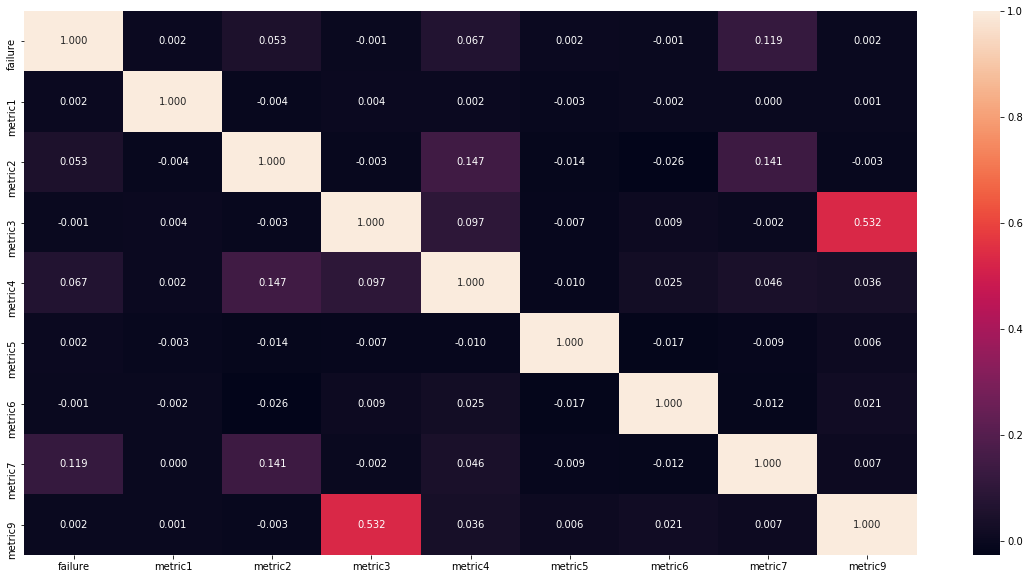

In [94]:
#Understanding feature correlation 
import seaborn as sns
drop_columns=['date','date_ym']
data_df = g_df.drop(drop_columns, axis=1)
plt.figure(figsize=(20,10))
data_corr = data_df.corr()
sns.heatmap(data_corr,annot=True,fmt='0.3f')
plt.show()

<font size=3>__Building predictive models using machine learning techniques to predict the probability of a device failure__</font>

Steps involved in building predictive model
    -  Data Cleaning, Sampling, Standardization and Feature Engineering 
    -  Missing Value imputation if required
    -  Building baseline models using different alogrithms and model selection
    -  Hyper-parameter tuning
    -  Performance Metrics

In [98]:
#importing additional packages
import sklearn
import os
import math
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection, preprocessing, metrics
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier, GradientBoostingClassifier, VotingClassifier,AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import make_scorer, accuracy_score,confusion_matrix 
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
import lightgbm as lgb

In [107]:
#Lable encoding categorical column (id)
category_columns = ['id']
for col in category_columns:
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(g_df[col].values.astype('str')))
    g_df[col] = lbl.transform(list(g_df[col].values.astype('str')))

In [108]:
#Creating train and test (validation) data sets with a 80-20 split
from sklearn.model_selection import train_test_split
data_df=g_df
drop_columns=['failure','date_dt','date_ym','date']
X = data_df.drop(drop_columns, axis=1)
Y = data_df['failure']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

Shape of x_train (99595, 9)
Shape of y_train (99595,)
Shape of x_valid (24899, 9)
Shape of y_valid (24899,)


In [109]:
#Applying 3 fold cross-validation
kfold = StratifiedKFold(n_splits=3)
random_state = 10

Building Baseline models

      Algorithm  CrossValMeans  CrossValerrors
0  DecisionTree       0.511824        0.008481
1  RandomForest       0.594565        0.058806
2           GBM       0.771701        0.049992
3      Logistic       0.483132        0.009385
4      LightGBM       0.724022        0.077255


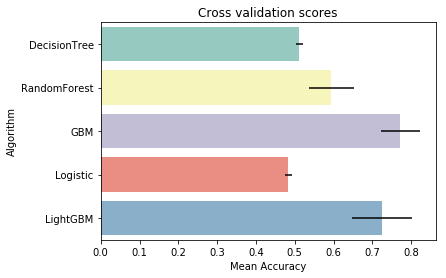

In [110]:
classifiers = []
classifiers.append(DecisionTreeClassifier(random_state=random_state))
classifiers.append(RandomForestClassifier(random_state=random_state))
classifiers.append(GradientBoostingClassifier(random_state=random_state))
classifiers.append(LogisticRegression(random_state = random_state))
classifiers.append(lgb.LGBMRegressor(random_state = random_state))


cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = Y_train, scoring = "roc_auc", cv = kfold, n_jobs=4))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["DecisionTree",
"RandomForest","GBM","Logistic","LightGBM"]})

g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")
print(cv_res)

Based on the above results, since GBM and LightGBM have better performance, applying hyper-parameter tuning for both algorithms

LightGBM

In [111]:
#Tuning LightGBM model with various paramaters ranges
#n_estimators ranges between 50 to 300 in increments of 50
#learning_rate - 0.01,0.001,0.05,0.25,0.05,0.1
#max_depth - 2,3,4
model = lgb.LGBMRegressor(objective=None, njobs=9, n_estimators=50, learning_rate=0.05, sub_sample=0.75, max_depth=3)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [112]:
#Though accuracy and roc_auc looks fine, f1 score is 0; this is because dataset is very imbalanced
print("Light GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("F1 Score:", f1_score)
print("Accuracy Score:", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print()
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions.round()))
print()
print("Classification Report")
print(classification_report(Y_test, test_predictions.round()))
CM=confusion_matrix(Y_test, test_predictions.round())
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])
print("-------------------------------")

Light GBM Classification Model Performance Metrics:
-------------------------------
F1 Score: 0.0
Accuracy Score: 0.9990762681232178
roc_auc: 0.8443759307032446
gini: 0.6887518614064891

Confusion Matrix:


/opt/python/python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


[[24876     0]
 [   23     0]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24876
           1       0.00      0.00      0.00        23

   micro avg       1.00      1.00      1.00     24899
   macro avg       0.50      0.50      0.50     24899
weighted avg       1.00      1.00      1.00     24899

TN =  24876
FN = 23
TP = 0
FP = 0
-------------------------------


/opt/python/python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/python/python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/opt/python/python35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


GBM

In [113]:
# Tune Gradient Boosting  with various learning rates
# compute the accuracy scores on train and validation sets when training with different learning rates

learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features='sqrt', max_depth = 3, random_state = 0,subsample=0.8)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.999
Accuracy score (validation): 0.999

Learning rate:  0.1
Accuracy score (training): 0.999
Accuracy score (validation): 0.999

Learning rate:  0.25
Accuracy score (training): 0.999
Accuracy score (validation): 0.999

Learning rate:  0.5
Accuracy score (training): 0.987
Accuracy score (validation): 0.987

Learning rate:  0.75
Accuracy score (training): 0.001
Accuracy score (validation): 0.001

Learning rate:  1
Accuracy score (training): 0.929
Accuracy score (validation): 0.929



In [117]:
#Thought f1 score is a little better compared to LightGBM, but other metrics like gini are not good; model needs to be imporved 
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.25, max_features='sqrt',
                                min_samples_split=400,max_depth = 2, random_state = 0,subsample=0.8) #300,400
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)
print("GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(predictions.round(), Y_test)
accuracy = metrics.accuracy_score(predictions.round(), Y_test)
print("F1 Score:", f1_score)
print("Accuracy Score:", accuracy)
fpr, tpr, _ = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print()
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions.round()))
print()
print("Classification Report")
print(classification_report(Y_test, predictions.round()))
CM=confusion_matrix(Y_test, predictions.round())
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])

GBM Classification Model Performance Metrics:
-------------------------------
F1 Score: 0.9428485153497735
Accuracy Score: 0.9429415547873623
roc_auc: 0.9429530494453267
gini: 0.8859060988906533

Confusion Matrix:
[[23499  1311]
 [ 1528 23418]]

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94     24810
           1       0.95      0.94      0.94     24946

   micro avg       0.94      0.94      0.94     49756
   macro avg       0.94      0.94      0.94     49756
weighted avg       0.94      0.94      0.94     49756

TN =  23499
FN = 1528
TP = 23418
FP = 1311


From the above results, it is evident that failures are not been identified by the model

<font size=3>__Applying Sampling and Standardization__</font>

SMOTE: Synthetic Minority Over-sampling Technique,is an oversampling method and applying standardization

In [115]:
#Applying SMOTE for oversampling
from imblearn.over_sampling import SMOTE
X_1 = data_df.drop(drop_columns, axis=1)
Y_1 = data_df['failure']
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_1, Y_1)
print(X.shape, Y.shape)
#Normalization
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

(248776, 9) (248776,)
Shape of x_train (199020, 9)
Shape of y_train (199020,)
Shape of x_valid (49756, 9)
Shape of y_valid (49756,)


/opt/python/python35/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/opt/python/python35/lib/python3.5/site-packages/sklearn/utils/validation.py:590: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


LightGBM after applying sampling

In [116]:
model = lgb.LGBMRegressor(objective=None, njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)

In [118]:
print("Light GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions.round()))
print()
print("Classification Report")
print(classification_report(Y_test, test_predictions.round()))
CM=confusion_matrix(Y_test, test_predictions.round())
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])
print("-------------------------------")

Light GBM Classification Model Performance Metrics:
-------------------------------
F1 Score 0.9670025290032517
Accuracy Score 0.9669587587426642
roc_auc: 0.9947541683991472
gini: 0.9895083367982944
Confusion Matrix:
[[24023   787]
 [  857 24089]]

Classification Report
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     24810
           1       0.97      0.97      0.97     24946

   micro avg       0.97      0.97      0.97     49756
   macro avg       0.97      0.97      0.97     49756
weighted avg       0.97      0.97      0.97     49756

TN =  24023
FN = 857
TP = 24089
FP = 787
-------------------------------


LightGBM results look much better after applying SMOTE in terms of f1 score, precision, gini however FN and FP are still high

GBM after applying sampling

In [119]:
learning_rates = [0.05, 0.1, 0.25, 0.5, 0.75, 1]
for learning_rate in learning_rates:
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate = learning_rate, max_features='sqrt', max_depth = 3, random_state = 0,subsample=0.8)
    gb.fit(X_train, Y_train)
    print("Learning rate: ", learning_rate)
    print("Accuracy score (training): {0:.3f}".format(gb.score(X_train, Y_train)))
    print("Accuracy score (validation): {0:.3f}".format(gb.score(X_test, Y_test)))
    print()

Learning rate:  0.05
Accuracy score (training): 0.942
Accuracy score (validation): 0.941

Learning rate:  0.1
Accuracy score (training): 0.950
Accuracy score (validation): 0.948

Learning rate:  0.25
Accuracy score (training): 0.977
Accuracy score (validation): 0.976

Learning rate:  0.5
Accuracy score (training): 0.989
Accuracy score (validation): 0.987

Learning rate:  0.75
Accuracy score (training): 0.990
Accuracy score (validation): 0.989

Learning rate:  1
Accuracy score (training): 0.991
Accuracy score (validation): 0.991



In [123]:
gb = GradientBoostingClassifier(n_estimators=50, learning_rate = 0.5, max_features='sqrt',
                                min_samples_split=400,max_depth = 6, random_state = 0,subsample=0.8) #300,400
gb.fit(X_train, Y_train)
predictions = gb.predict(X_test)
print("GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(predictions.round(), Y_test)
accuracy = metrics.accuracy_score(predictions.round(), Y_test)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))
CM=confusion_matrix(Y_test, predictions)
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])
print("-------------------------------")

GBM Classification Model Performance Metrics:
-------------------------------
F1 Score 0.9957317195358997
Accuracy Score 0.9957191092531554
roc_auc: 0.9957184729818505
gini: 0.9914369459637009
Confusion Matrix:
[[24698   112]
 [  101 24845]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24810
           1       1.00      1.00      1.00     24946

   micro avg       1.00      1.00      1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756

TN =  24698
FN = 101
TP = 24845
FP = 112
-------------------------------


By applying SMOTE on GBM and hyper-parameter tuning, FN and FP have come down from 1644 to 213, which is a good improvement

Feature Engineering

Adding additional features:

 1. Weekend: indicator that tags 1 if it is a weekend else 0<br>
 2. week_no: indicates the week number (1,2,3,4) 
 3. day_of_week: tagging the day of the week (1,2,...7) 
 4. Day : tagging the day no of the month 
 5. Timeframe based aggregations: calculated mean,max,min values of all metrices in the past 7,14,30,60 and 90 days 
In total, ~120 additional features were created

In [126]:
import datetime
new_data = g_df
#week = dt.datetime(2015,9,1).isocalendar()[1]
new_data['week_no'] = new_data.date_dt.apply(lambda x:x.isocalendar()[1]) -1
new_data['day_of_week']  = new_data.date_dt.apply(lambda x:x.isocalendar()[2])
new_data['Weekend'] = new_data['week_no'].apply(lambda x:'1' if (x == 6 or x == 7) else '0')
#df['equal_or_lower_than_4?'] = df['set_of_numbers'].apply(lambda x: 'True' if x <= 4 else 'False')

days = [7, 14, 30, 60, 90] #loolback_days
numbers = [1, 2, 3, 4, 5, 6, 7, 9] #metrics
for day in days:
    for metric in numbers:
        new_data['metric' + str(metric) + '_' + str(day) + '_mean'] = g_df.groupby('id', sort=False)['metric' + str(metric)].transform(lambda x: x.rolling(day).mean())
        new_data['metric' + str(metric) + '_' + str(day) + '_min'] = g_df.groupby('id', sort=False)['metric' + str(metric)].transform(lambda x: x.rolling(day).min())
        new_data['metric' + str(metric) + '_' + str(day) + '_max'] = g_df.groupby('id', sort=False)['metric' + str(metric)].transform(lambda x: x.rolling(day).max())
print(new_data.head())

         date  id  failure    metric1  metric2  metric3  metric4  metric5  \
0  2015-01-01   0        0  215630672       56        0       52        6   
1  2015-01-01   2        0   61370680        0        3        0        6   
2  2015-01-01   3        0  173295968        0        0        0       12   
3  2015-01-01   4        0   79694024        0        0        0        6   
4  2015-01-01   5        0  135970480        0        0        0       15   

   metric6  metric7  metric9    date_dt  date_ym  week_no  day_of_week  \
0   407438        0        7 2015-01-01  2015-01        0            4   
1   403174        0        0 2015-01-01  2015-01        0            4   
2   237394        0        0 2015-01-01  2015-01        0            4   
3   410186        0        0 2015-01-01  2015-01        0            4   
4   313173        0        3 2015-01-01  2015-01        0            4   

  Weekend  metric1_7_mean  metric1_7_min  metric1_7_max  metric2_7_mean  \
0       0        

In [130]:
print(new_data.tail(3))

              date    id  failure    metric1  metric2  metric3  metric4  \
124491  2015-11-02  1075        0   19029120     4832        0        0   
124492  2015-11-02  1081        0  226953408        0        0        0   
124493  2015-11-02  1082        0   17572840        0        0        0   

        metric5  metric6  metric7  metric9    date_dt  date_ym  week_no  \
124491       11   350410        0        0 2015-11-02  2015-11       44   
124492       12   358980        0        0 2015-11-02  2015-11       44   
124493       10   351431        0        0 2015-11-02  2015-11       44   

        day_of_week Weekend  metric1_7_mean  metric1_7_min  metric1_7_max  \
124491            1       0    9.234223e+07     19029120.0    194069528.0   
124492            1       0    1.316748e+08      4984656.0    226953408.0   
124493            1       0    9.614759e+07     17572840.0    178275912.0   

        metric2_7_mean  metric2_7_min  metric2_7_max  metric3_7_mean  \
124491          4

In [131]:
#Applying SMOTE on new dataset with additional time based aggregated features and making a 80-20 split between train and test
new_data.fillna(0, inplace=True)
X_1 = new_data.drop(drop_columns, axis=1)
Y_1 = new_data['failure']
sm = SMOTE(random_state=42)
X, Y = sm.fit_resample(X_1, Y_1)
print(X.shape, Y.shape)
X = StandardScaler().fit_transform(X)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
print("Shape of x_train",X_train.shape)
print("Shape of y_train",Y_train.shape)
print("Shape of x_valid",X_test.shape)
print("Shape of y_valid",Y_test.shape)

(248776, 132) (248776,)
Shape of x_train (199020, 132)
Shape of y_train (199020,)
Shape of x_valid (49756, 132)
Shape of y_valid (49756,)


In [182]:
#Creating a new dataframe with column names
out=list(X_1.columns)
col_ind = pd.DataFrame(index=range(len(out)))
col_ind['col_names']= out

LightGBM with additional features

In [134]:
model = lgb.LGBMRegressor(objective=None, njobs=9, n_estimators=100, learning_rate=0.03, sub_sample=0.75, max_depth=8)
model.fit(X_train, Y_train)
train_predictions = model.predict(X_train)
test_predictions = model.predict(X_test)
train_predictions = np.array(train_predictions)
test_predictions = np.array(test_predictions)
Y_train = np.array(Y_train)
Y_test = np.array(Y_test)
print(train_predictions.shape, Y_train.shape)
print(test_predictions.shape, Y_test.shape)

(199020,) (199020,)
(49756,) (49756,)


In [135]:
print("Light GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(test_predictions.round(), Y_test)
accuracy = metrics.accuracy_score(test_predictions.round(), Y_test)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, test_predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, test_predictions.round()))
print()
print("Classification Report")
print(classification_report(Y_test, test_predictions.round()))
CM=confusion_matrix(Y_test, test_predictions.round())
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])
print("-------------------------------")

Light GBM Classification Model Performance Metrics:
-------------------------------
F1 Score 0.9894426516871837
Accuracy Score 0.9893480183294477
roc_auc: 0.9990690968241098
gini: 0.9981381936482197
Confusion Matrix:
[[24390   328]
 [  202 24836]]

Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     24718
           1       0.99      0.99      0.99     25038

   micro avg       0.99      0.99      0.99     49756
   macro avg       0.99      0.99      0.99     49756
weighted avg       0.99      0.99      0.99     49756

TN =  24390
FN = 202
TP = 24836
FP = 328
-------------------------------


Text(0.5, 0, 'Relative Importance')

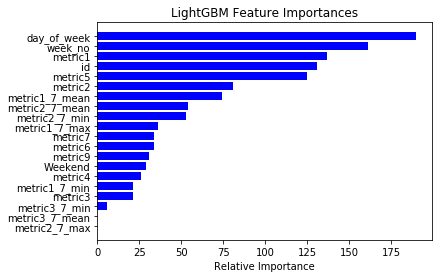

In [209]:
features = col_ind['col_names']
importances = model.feature_importances_[:20]
indices = np.argsort(importances)[:20]
plt.figure(1)
plt.title('LightGBM Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

FN and FPs have reduced a lot from 1644 to 530 which shows that by adding meaningful features model performance has increased

GBM with additional features

Iterative Hyper-parameter tuning

In [138]:
#tuning n_estimators
param_test1 = {'n_estimators':range(50,100,150)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, max_depth=3,max_features='sqrt', subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='f1',n_jobs=4,iid=False, cv=kfold)
gsearch1.fit(X_train,Y_train)
gsearch1.best_params_, gsearch1.best_score_

({'n_estimators': 50}, 0.9682642482559412)

In [141]:
#tuning max_depth
param_test2 = {'max_depth':range(3,6,1)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,min_samples_split=200,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test2, scoring='f1',n_jobs=4,iid=False, cv=kfold)
gsearch2.fit(X_train,Y_train)
gsearch2.best_params_, gsearch2.best_score_

({'max_depth': 5}, 0.9857102639782712)

In [154]:
#tuning subsample
param_test4 = {'subsample':[0,6,0.75,0.8]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,min_samples_split=200,max_features='sqrt',max_depth=5,random_state=10),
param_grid = param_test4, scoring='f1',n_jobs=4,iid=False, cv=kfold)
gsearch4.fit(X_train,Y_train)
gsearch4.best_params_, gsearch4.best_score_

({'subsample': 0.8}, 0.9857102639782712)

In [155]:
#tuning min_samples_split
param_test5 = {'min_samples_split':[300,400]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1,n_estimators=50,max_features='sqrt',max_depth=5,subsample=0.85,random_state=10),
param_grid = param_test5, scoring='f1',n_jobs=4,iid=False, cv=kfold)
gsearch5.fit(X_train,Y_train)
gsearch5.best_params_, gsearch5.best_score_

({'min_samples_split': 400}, 0.9851140422002723)

In [156]:
#tuning learning_rates
param_test6 = {'learning_rate': [0.05, 0.1, 0.25, 0.5, 0.75, 1]}
gsearch6 = GridSearchCV(estimator = GradientBoostingClassifier(min_samples_split=200,n_estimators=50,max_features='sqrt',max_depth=5,subsample=0.85,random_state=10),
param_grid = param_test6, scoring='f1',n_jobs=4,iid=False, cv=kfold)
gsearch6.fit(X_train,Y_train)
gsearch6.best_params_, gsearch6.best_score_

({'learning_rate': 0.5}, 0.9989335752088989)

In [151]:
#Final model with tuned hyper-parameter settings
GBC1 = GradientBoostingClassifier()
gb_param_grid = {
              'learning_rate': [0.5],
              'max_depth': [5],
              'subsample':[0.8],
              'n_estimators':[50],
              'max_features':['sqrt'],
              'random_state':[0],
               'min_samples_split':[400]
              }

gsGBC1 = GridSearchCV(GBC1,param_grid = gb_param_grid, cv=kfold, scoring="f1", n_jobs= 4, verbose = 1)
gsGBC1.fit(X_train,Y_train)
GBC_best1 = gsGBC1.best_estimator_

# Best score
gsGBC1.best_params_, gsGBC1.best_score_

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   3 out of   3 | elapsed:   37.6s finished


({'learning_rate': 0.5,
  'max_depth': 5,
  'max_features': 'sqrt',
  'min_samples_split': 400,
  'n_estimators': 50,
  'random_state': 0,
  'subsample': 0.8},
 0.9988480833170397)

In [152]:
predictions = gsGBC1.predict(X_test)
print("GBM Classification Model Performance Metrics:")
print("-------------------------------")
f1_score = metrics.f1_score(predictions.round(), Y_test)
accuracy = metrics.accuracy_score(predictions.round(), Y_test)
print("F1 Score", f1_score)
print("Accuracy Score", accuracy)
fpr, tpr, _ = roc_curve(Y_test, predictions)
roc_auc = auc(fpr, tpr)
print("roc_auc:",roc_auc)
print("gini:",(roc_auc*2)-1)
print("Confusion Matrix:")
print(confusion_matrix(Y_test, predictions))
print()
print("Classification Report")
print(classification_report(Y_test, predictions))
CM=confusion_matrix(Y_test, predictions)
print("TN = ",CM[0][0])
print("FN =", CM[1][0])
print("TP =", CM[1][1])
print("FP =", CM[0][1])
print("-------------------------------")

GBM Classification Model Performance Metrics:
-------------------------------
F1 Score 0.9992214481065219
Accuracy Score 0.9992161749336763
roc_auc: 0.9992139450260704
gini: 0.9984278900521408
Confusion Matrix:
[[24690    28]
 [   11 25027]]

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     24718
           1       1.00      1.00      1.00     25038

   micro avg       1.00      1.00      1.00     49756
   macro avg       1.00      1.00      1.00     49756
weighted avg       1.00      1.00      1.00     49756

TN =  24690
FN = 11
TP = 25027
FP = 28
-------------------------------


FN and FPs have reduced drastically from 213 to 39 which shows that by adding meaningful features model performance has increased which is also evident from below feature importance plot

Text(0.5, 0, 'Relative Importance')

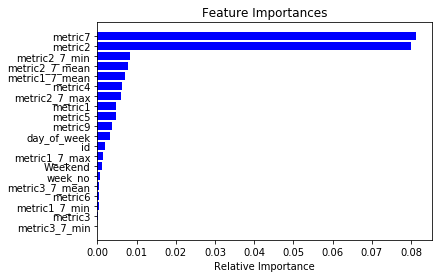

In [207]:
features = col_ind['col_names']
importances = GBC_best1.feature_importances_[:20]
indices = np.argsort(importances)[:20]
plt.figure(1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')


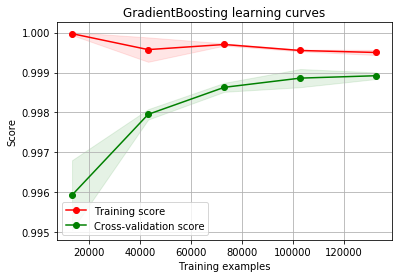

In [157]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    """Generate a simple plot of the test and training learning curve"""
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    return plt

g = plot_learning_curve(GBC_best1,"GradientBoosting learning curves",X_train,Y_train,cv=kfold)

From the above graph it is evident that as the no of training samples increase both training and cross validation curves tend to come closer so GBM seems to better generalize the prediction 

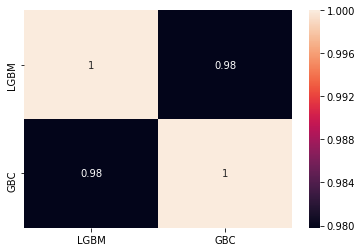

In [215]:


pred_LGBM = pd.Series(model.predict(X_test).round(), name="LGBM")
pred_GBC = pd.Series(GBC_best1.predict(X_test), name="GBC")

pred_prob_LGBM = model.predict(X_test)
pred_prob_GBC = GBC_best1.predict_proba(X_test)

# Concatenate all classifier results
ensemble_results = pd.concat([pred_LGBM,pred_GBC],axis=1)

g= sns.heatmap(ensemble_results.corr(),annot=True)

The prediction seems to be quite similar for both the classifiers, however GBM stands out to be the champion model for this use case since total no of FN and FPs are lower for GBM compared to LGBM

__Business Use Case:__ <br>
Maintenance is usually considered as a cost-centre or necessary evil, because it costs the company unnecessarily big budget, while it should be treated as a profit-generating centre. Such predictive models turns out be a great source which help maintenance and operation answer questions like is this the right time to perform checks/fixes, should the machine be terminated or continued for various use cases like serves, clusters,data centers, chips, GPUs, conveyer belts in the warehouses, servicing vans during package delivery.<br>
These models need to be constantly re-training with new data, so that the predicted probablities stay as relevant as possible <br>
An A/B test can also be performed, a check to see if such models are actually helping in reducting cost

1. One cell, with machines going through regularly checks/maintainance practices
2. Second cell, with machines sent to maintenance only when the probablity of failure is greater than X (threshold)

At the end of the test, we will get to know what was dollar impact (profit) of the model to our current setup
